# Investigation of b-tag score and its dependence on mHreco

In [1]:
NMSSM_MX_700_MY_400 = '/eos/uscms/store/user/srosenzw/sixb/sixb_ntuples/old_skims/NMSSM/NMSSM_XYH_YToHH_6b_MX_700_MY_400/ntuple.root'
JetHT_Data_UL = '/eos/uscms/store/user/srosenzw/sixb/sixb_ntuples/old_skims/JetHT_Data_UL/ntuple.root'

In [2]:
datTree = Tree(JetHT_Data_UL)
datTree.initialize_t6_X()

X = datTree.t6_X

In [3]:
sigTree = Tree(NMSSM_MX_700_MY_400)
sigTree.initialize_t6_X()

sig_X = sigTree.t6_X

In [6]:
cut_6jNN = 0

# edges of mH windows
SR_edge = 25 # GeV
VR_edge = 60 # GeV
CR_edge = 120 # GeV

In [7]:
mH = 125 # GeV

SR_lo = mH - SR_edge
SR_hi = mH + SR_edge

VR_lo = mH - VR_edge
VR_hi = mH + VR_edge

CR_lo = mH - CR_edge
CR_hi = mH + CR_edge

### <span style="font-variant:small-caps;"><font size=4>Region</font></span>: <font size=3>Masks</font>

In [8]:
### SIGNAL ###
sig_Dm_cand = abs(sigTree.t6_higgs_m - 125)

# triple mass veto
sig_SR = ak.all(sig_Dm_cand <= SR_edge, axis=1) # SR
sig_VR = ak.all(sig_Dm_cand > SR_edge, axis=1) & ak.all(sig_Dm_cand <= VR_edge, axis=1) # VR
sig_CR = ak.all(sig_Dm_cand > VR_edge, axis=1) # CR

In [9]:
#### DATA ####

# dat_m_cand = datTree.t6_higgs_m[:,2]
dat_Dm_cand = abs(datTree.t6_higgs_m - 125)
dat_Dm      = datTree.t6_higgs_m - 125

# triple mass veto
dat_SR = ak.all(dat_Dm_cand <= SR_edge, axis=1) # SR

In [10]:
sig_sums = ak.sum(sigTree.t6_jet_btag, axis=1)/6
dat_sums = ak.sum(datTree.t6_jet_btag, axis=1)[~dat_SR]/6

In [37]:
sig_m1 = sigTree.t6_higgs_m[:,0]
sig_m2 = sigTree.t6_higgs_m[:,1]
sig_m3 = sigTree.t6_higgs_m[:,2]

dat_m1 = datTree.t6_higgs_m[:,0][~dat_SR]
dat_m2 = datTree.t6_higgs_m[:,1][~dat_SR]
dat_m3 = datTree.t6_higgs_m[:,2][~dat_SR]

In [34]:
nbins = 60
mBins = np.linspace(0,2000,nbins)

mHbins = np.linspace(0,750,100)
score_bins = np.linspace(0.35,1,100)

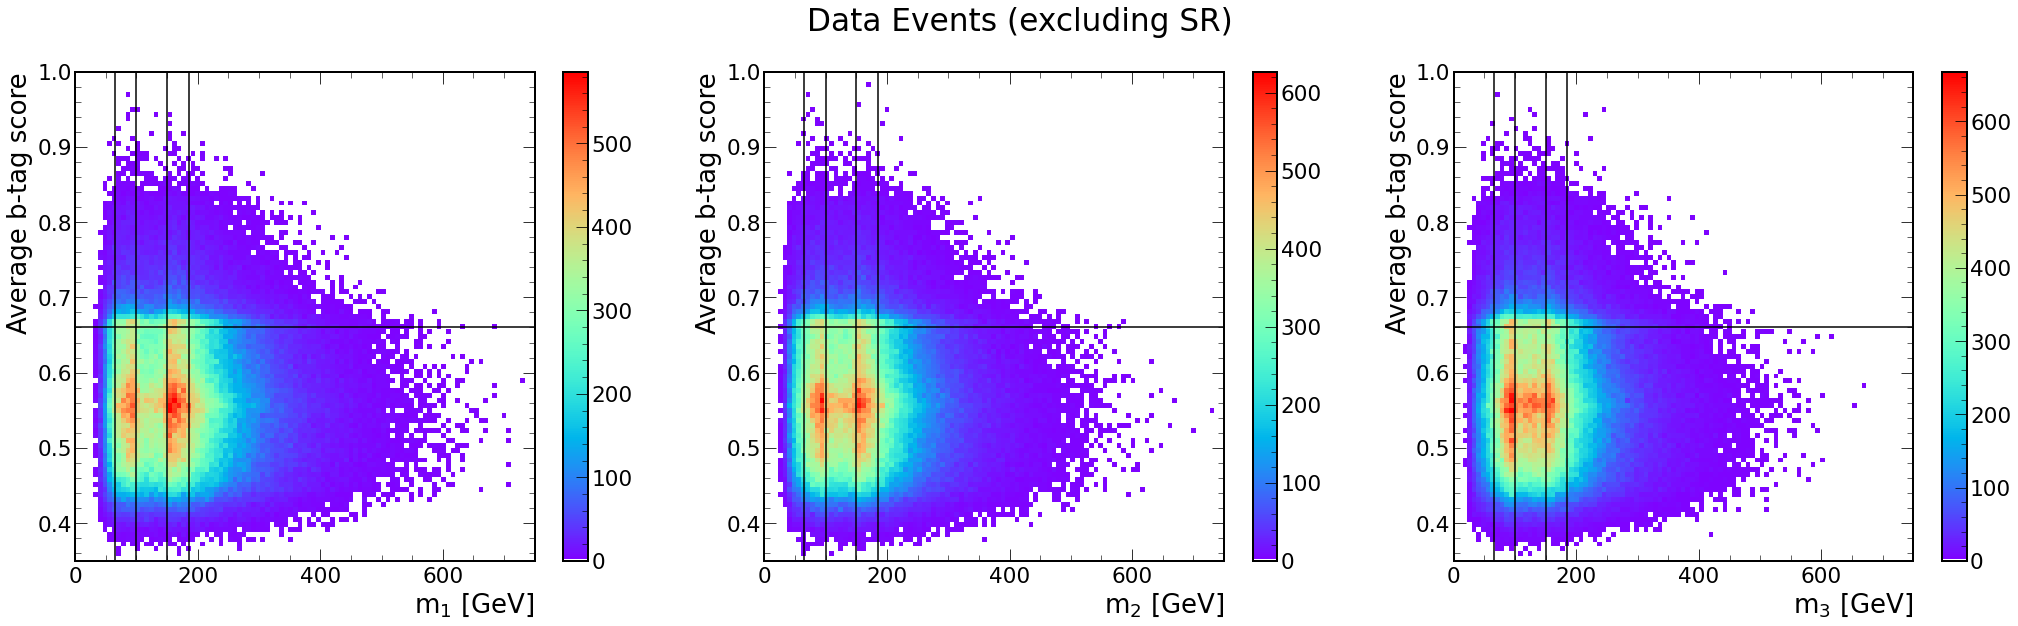

In [47]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(35,9))

ax = axs[0]
n,xe,ye,im = Hist2d(dat_m1, dat_sums, bins=(mHbins, score_bins), ax=ax)
fig.colorbar(im, ax=ax)

ax = axs[1]
n,xe,ye,im = Hist2d(dat_m2, dat_sums, bins=(mHbins, score_bins), ax=ax)
fig.colorbar(im, ax=ax)

ax = axs[2]
n,xe,ye,im = Hist2d(dat_m3, dat_sums, bins=(mHbins, score_bins), ax=ax)
fig.colorbar(im, ax=ax)

for i,ax in enumerate(axs.flatten()):
    ax.set_ylabel('Average b-tag score')
    ax.set_xlabel(f'$m_{i+1}$ [GeV]')
    ax.plot([mHbins.min(), mHbins.max()],[0.66,0.66], color='k')
    ax.plot([100,100],[score_bins.min(), score_bins.max()], color='k')
    ax.plot([150,150],[score_bins.min(), score_bins.max()], color='k')
    ax.plot([65,65],[score_bins.min(), score_bins.max()], color='k')
    ax.plot([185,185],[score_bins.min(), score_bins.max()], color='k')

fig.suptitle('Data Events (excluding SR)')

fig.savefig('../plots/Data_SRexclusion_btag_v_mHreco.pdf', bbox_inches='tight')

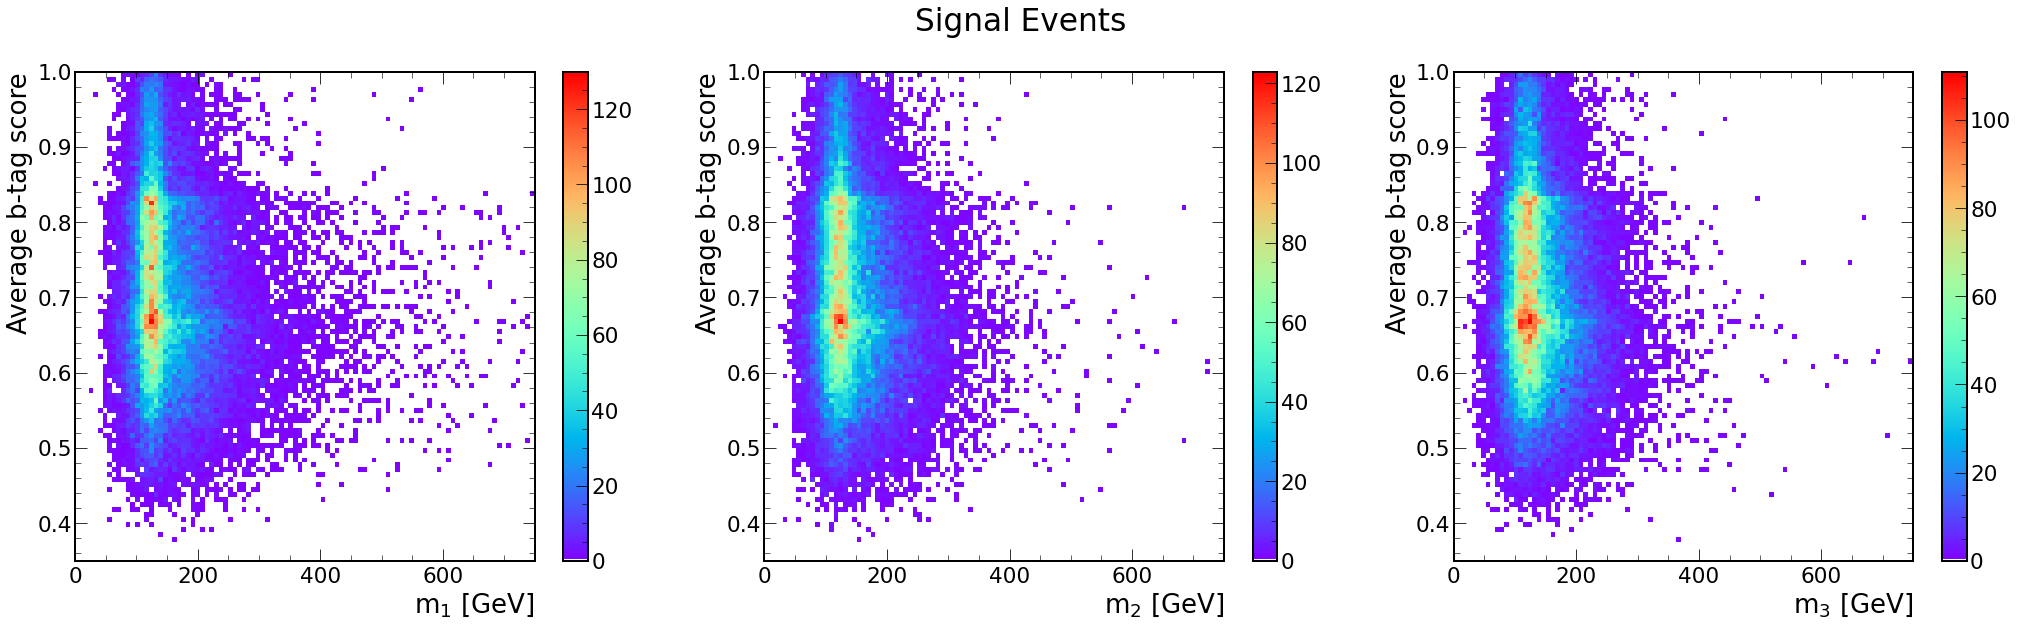

In [40]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(35,9))

ax = axs[0]
n,xe,ye,im = Hist2d(sig_m1, sig_sums, bins=(mHbins, score_bins), ax=ax)
fig.colorbar(im, ax=ax)

ax = axs[1]
n,xe,ye,im = Hist2d(sig_m2, sig_sums, bins=(mHbins, score_bins), ax=ax)
fig.colorbar(im, ax=ax)

ax = axs[2]
n,xe,ye,im = Hist2d(sig_m3, sig_sums, bins=(mHbins, score_bins), ax=ax)
fig.colorbar(im, ax=ax)

for i,ax in enumerate(axs.flatten()):
    ax.set_ylabel('Average b-tag score')
    ax.set_xlabel(f'$m_{i+1}$ [GeV]')

fig.suptitle('Signal Events')

fig.savefig('Signal_700_400_btag_v_mHreco.pdf', bbox_inches='tight')

In [30]:
sig_4sums = ak.sum(sigTree.t6_jet_btag[:,:4], axis=1)/4
dat_4sums = ak.sum(datTree.t6_jet_btag[:,:4], axis=1)[~dat_SR]/4

Text(0.5, 0.98, 'Data Events (excluding SR)')

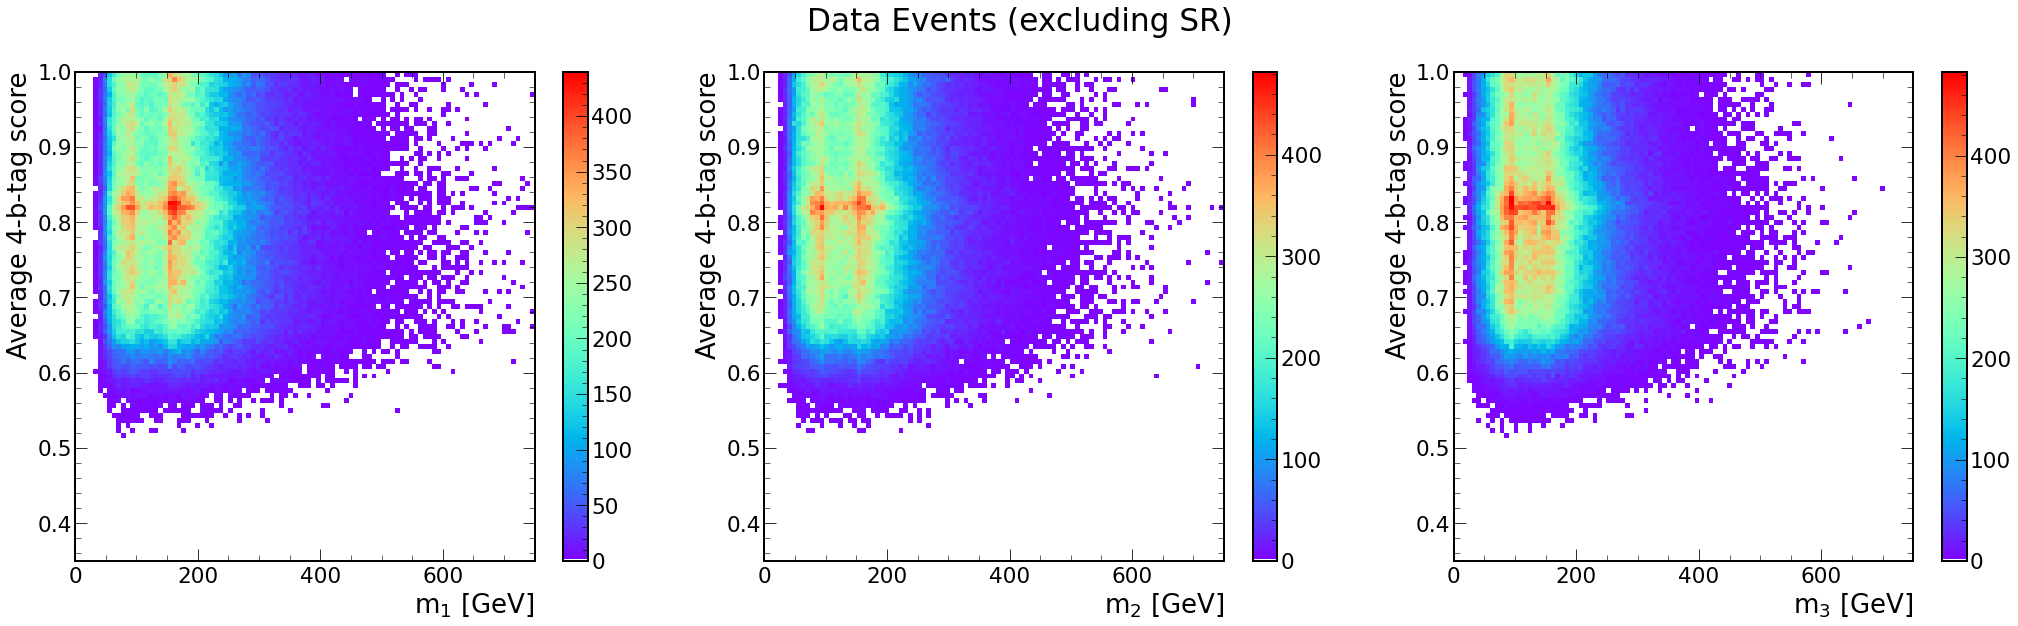

In [35]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(35,9))

ax = axs[0]
n,xe,ye,im = Hist2d(dat_m1, dat_4sums, bins=(mHbins, score_bins), ax=ax)
fig.colorbar(im, ax=ax)

ax = axs[1]
n,xe,ye,im = Hist2d(dat_m2, dat_4sums, bins=(mHbins, score_bins), ax=ax)
fig.colorbar(im, ax=ax)

ax = axs[2]
n,xe,ye,im = Hist2d(dat_m3, dat_4sums, bins=(mHbins, score_bins), ax=ax)
fig.colorbar(im, ax=ax)

for i,ax in enumerate(axs.flatten()):
    ax.set_ylabel('Average 4-b-tag score')
    ax.set_xlabel(f'$m_{i+1}$ [GeV]')

fig.suptitle('Data Events (excluding SR)')